# Parameter estimation for single neuron model

In [73]:
import synapticflow
import torch
import pandas as pd
import numpy as np
import math
import seaborn as sns 
import matplotlib.pyplot as plt
from synapticflow import network

In [74]:
# loading data 
mods = [1, 2, 3, 4, 5]
input_current = []
spikes_data = []
for i in (((400222057) % 6) * mods):
  input_current.append(pd.read_csv(f'D:/dars/term 4/Computational neuroscience/Computational-neuroscience/Assignment 2/input_{i}.csv'))
  spikes_data.append(pd.read_csv(f'D:/dars/term 4/Computational neuroscience/Computational-neuroscience/Assignment 2/spikes_{i}.csv'))

In [75]:
# creating a dataset for final benchmark
benchmarking = pd.DataFrame(columns= ['model_spikes', 'matches','gamma'])

In [76]:
input_current[0]

,Time(mS),Input_current(pA),Membrane potential(mV)
0,0.0,-4.375,-63.8047
1,1.0,-4.375,-63.8672
2,2.0,0.625,-63.7422
3,3.0,10.625,-63.7422
4,4.0,-4.375,-63.6797
...,...,...,...
33995,33995.0,-4.375,-65.6172
33996,33996.0,10.625,-65.4922
33997,33997.0,10.625,-65.4922
33998,33998.0,-4.375,-65.4922


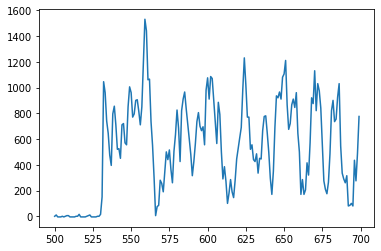

In [77]:
plt.plot(input_current[2]['Input_current(pA)'][500:700])

In [78]:
def plot_pot(data):
    plt.plot(data['Membrane potential(mV)'][:100])

### we gonna use LIF model for this input current

In [79]:
# calculating all spike time differences
def calculate_matchings(real_spikes, model_spikes):
    real_spikes = torch.tensor(real_spikes)
    model_spikes = torch.tensor(model_spikes)
    model_spikes = model_spikes.reshape(len(model_spikes), 1)
    diff = abs(real_spikes.sub(model_spikes))
    return diff[diff <= 2]

In [80]:
def gamma_factor(real_spikes, matchings, model_spikes):
    Nc = len(matchings)
    Nr = len(real_spikes)
    Nm = len(model_spikes)
    gamma = (Nc - 0.1*Nr) / (Nr + Nm)
    return gamma

In [81]:
def fitness_function(model, current_data, spikes_data):
    voltage = torch.zeros_like(torch.tensor(current_data['Input_current(pA)']))
    spike = torch.zeros_like(torch.tensor(current_data['Input_current(pA)']))
    for i, current in enumerate(current_data['Input_current(pA)']):
        model.forward(torch.tensor(current))
        voltage[i] = model.v
        spike[i] = model.s * current_data.iloc[i]['Time(mS)']
    spikes = spike[spike > 0]
    real_spikes = spikes_data['spike_times(ms)']
    matchings = calculate_matchings(real_spikes, spikes)
    gamma = gamma_factor(real_spikes, matchings, spikes)
    return voltage, spikes, matchings, gamma

In [115]:
def plot_attributes(model_voltage, real_voltage):
    fig, axs = plt.subplots(2, figsize = (7, 7))
  
    axs[0].plot(model_voltage[0:100])
    axs[0].set_title('model_voltage')
    axs[0].label_outer()
    
    axs[1].plot(real_voltage[real_voltage <= -46][0:100])
    axs[1].set_title('real_voltage')
    axs[1].label_outer()

### loading spike data from dataset

In [83]:
spikes_data[0]

,spike_times(ms)
0,549.0
1,558.0
2,601.0
3,647.0
4,673.0
...,...
870,33253.0
871,33314.0
872,33400.0
873,33424.0


### Run and visualise our model for first dataset

In [84]:
# fitting the best parameters for the model
model = network.LIFPopulation(n = 1,tau = 30, R = 0.19, threshold=-46, lower_bound=-64, 
                                    rest_pot=-63.87, reset_pot= -63.87, dt = 1, refrac_length=1)

In [85]:
voltage, m_spikes, matchings, gamma = fitness_function(model, input_current[0], spikes_data[0])

C:\Users\kara\AppData\Local\Temp\ipykernel_16332\2069508257.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  model_spikes = torch.tensor(model_spikes)


In [86]:
# print resaul of our model
def display(m_spikes, matchings, gamma):
    print(f"model spike: {len(m_spikes)}\nmodel matchings: {len(matchings)}\ngamma: {gamma}")

In [87]:
display(m_spikes, matchings, gamma)

model spike: 10137
model matchings: 1915
gamma: 0.16595532146749


C:\Users\kara\AppData\Local\Temp\ipykernel_16332\2642514148.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  axs[1].plot(real_voltage[real_voltage <= -46][0:100])


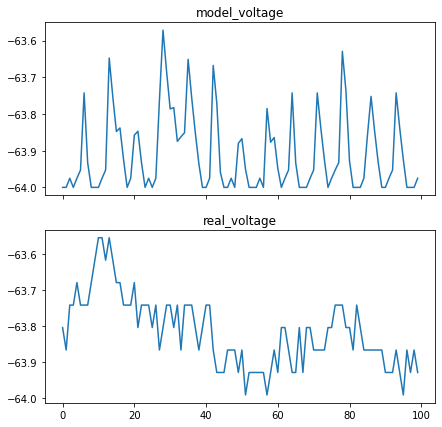

In [116]:
# plot the model voltage to compare with real voltage
plot_attributes(voltage, input_current[0]['Membrane potential(mV)'])

In [89]:
benchmarking.loc[len(benchmarking)] = [len(m_spikes), len(matchings), gamma]

## second dataset

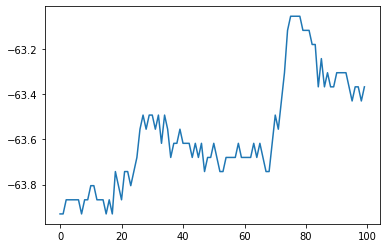

In [90]:
plot_pot(input_current[1])

In [91]:
voltage, m_spikes, matchings, gamma = fitness_function(model, input_current[1], spikes_data[1])

C:\Users\kara\AppData\Local\Temp\ipykernel_16332\2069508257.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  model_spikes = torch.tensor(model_spikes)


In [92]:
display(m_spikes, matchings, gamma)

model spike: 10136
model matchings: 1963
gamma: 0.1697417308563661


C:\Users\kara\AppData\Local\Temp\ipykernel_16332\2642514148.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  axs[1].plot(real_voltage[real_voltage <= -46][0:100])


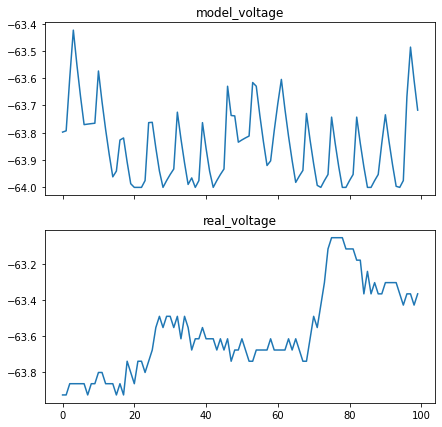

In [93]:
plot_attributes(voltage, input_current[1]['Membrane potential(mV)'])

In [94]:
benchmarking.loc[len(benchmarking)] = [len(m_spikes), len(matchings), gamma]

## third dataset

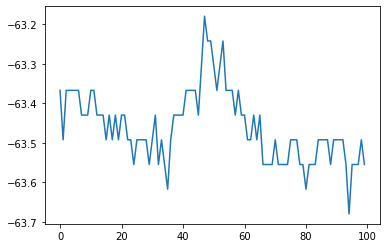

In [95]:
plot_pot(input_current[2])

its already same with previuos datasets, so we dont regenerate a new model and just call the `fitness_function`

In [96]:
voltage, m_spikes, matchings, gamma = fitness_function(model, input_current[2], spikes_data[2])

C:\Users\kara\AppData\Local\Temp\ipykernel_16332\2069508257.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  model_spikes = torch.tensor(model_spikes)


In [97]:
display(m_spikes, matchings, gamma)

model spike: 10141
model matchings: 1985
gamma: 0.17136264929424538


C:\Users\kara\AppData\Local\Temp\ipykernel_16332\2642514148.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  axs[1].plot(real_voltage[real_voltage <= -46][0:100])


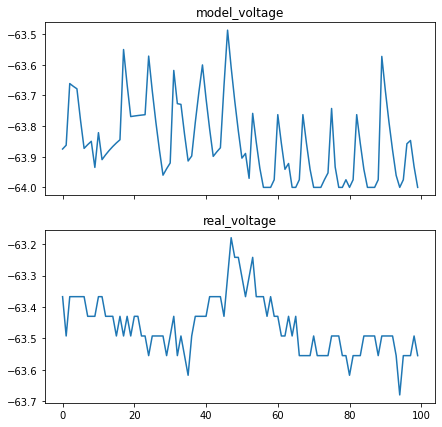

In [98]:
plot_attributes(voltage, input_current[2]['Membrane potential(mV)'])

In [99]:
benchmarking.loc[len(benchmarking)] = [len(m_spikes), len(matchings), gamma]

## fourth dataset

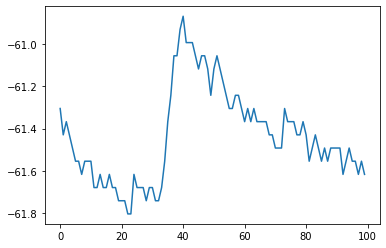

In [100]:
plot_pot(input_current[3])

In [101]:
voltage, m_spikes, matchings, gamma = fitness_function(model, input_current[3], spikes_data[3])

C:\Users\kara\AppData\Local\Temp\ipykernel_16332\2069508257.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  model_spikes = torch.tensor(model_spikes)


In [102]:
display(m_spikes, matchings, gamma)

model spike: 8871
model matchings: 987
gamma: 0.09775245330800886


C:\Users\kara\AppData\Local\Temp\ipykernel_16332\2642514148.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  axs[1].plot(real_voltage[real_voltage <= -46][0:100])


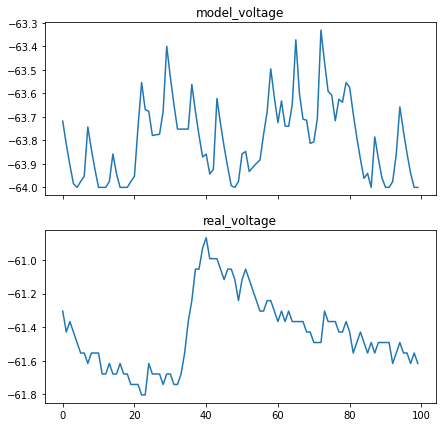

In [103]:
plot_attributes(voltage, input_current[3]['Membrane potential(mV)'])

In [104]:
benchmarking.loc[len(benchmarking)] = [len(m_spikes), len(matchings), gamma]

## fifth dataset

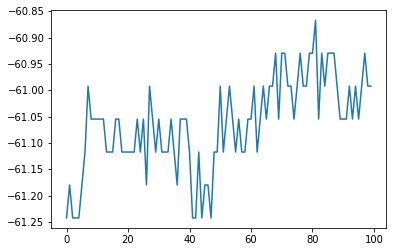

In [105]:
plot_pot(input_current[4])

In [106]:
voltage, m_spikes, matchings, gamma = fitness_function(model, input_current[4], spikes_data[4])

C:\Users\kara\AppData\Local\Temp\ipykernel_16332\2069508257.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  model_spikes = torch.tensor(model_spikes)


In [107]:
display(m_spikes, matchings, gamma)

model spike: 8873
model matchings: 1089
gamma: 0.1073984678350299


C:\Users\kara\AppData\Local\Temp\ipykernel_16332\2642514148.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  axs[1].plot(real_voltage[real_voltage <= -46][0:100])


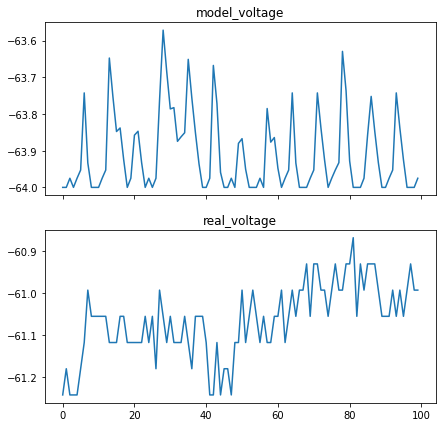

In [108]:
plot_attributes(voltage, input_current[4]['Membrane potential(mV)'])

In [109]:
benchmarking.loc[len(benchmarking)] = [len(m_spikes), len(matchings), gamma]

In [110]:
# benchmark
benchmarking

,model_spikes,matches,gamma
0,10137.0,1915.0,0.165955
1,10136.0,1963.0,0.169742
2,10141.0,1985.0,0.171363
3,8871.0,987.0,0.097752
4,8873.0,1089.0,0.107398


# SECOND METHOD FOR OPTIMIZATION

## Testing the AELIF model with default parameters 

In [97]:
model = network.AELIFPopulation(n = 1)

In [98]:
voltage = torch.zeros_like(torch.tensor(input_current[0]['Input_current(pA)']))
spike = torch.zeros_like(torch.tensor(input_current[0]['Input_current(pA)']))
for i, current in enumerate(input_current[0]['Input_current(pA)']):
    model.forward(torch.tensor(current))
    voltage[i] = model.v
    spike[i] = model.s * input_current[0].iloc[i]['Time(mS)']

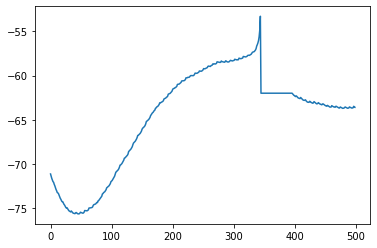

In [99]:
plt.plot(voltage[-500:])

In [835]:
spikes = spike_time_calculator(spike)
matchings = calculate_matchings(real_spikes, spikes)
gamma_factor(real_spikes, matchings, spikes)

0.014729299363057325

## Testing the LIF model

In [836]:
model1 = network.LIFPopulation(n = 1)

In [105]:
voltage1 = torch.zeros_like(torch.tensor(input_current[0]['Input_current(pA)']))
spike1 = torch.zeros_like(torch.tensor(input_current[0]['Input_current(pA)']))
for i, current in enumerate(input_current[0]['Input_current(pA)']):
    model1.forward(torch.tensor(current))
    voltage1[i] = model1.v
    spike1[i] = model1.s * input_current[0].iloc[i]['Time(mS)']

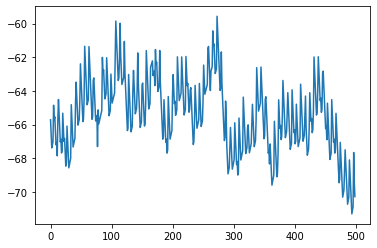

In [106]:
plt.plot(voltage1[-500:])

In [107]:
spiken = spike1.numpy()
spiken[spiken>0]
temp = []
for i in range(len(spiken)):
    if spiken[i] != 0:
        temp.append(spiken[i])
len(temp)

633

In [108]:
matchings = []
for i in range(len(temp)):
    for j in range(len(real_spikes)):
        diff = abs(temp[i] - real_spikes[j])
        matchings.append(diff)
len(matchings)

591855

In [109]:
# calculating the coincidences and number of spikes
matchings = np.array(matchings)
Nc = len(matchings[matchings<=4])
Nr = len(real_spikes)
Nm = len(temp)

In [110]:
gamma = (Nc - 0.1*Nr) / (Nr + Nm)
gamma

0.05133928571428571

# testing ELIF model

In [111]:
model2 = network.AELIFPopulation(n = 1, tau_s=40, tau_w=70, R = 0.5, threshold=-52, 
                                 rest_pot=-62, theta_rh= -30, dt = 1, delta_T=1)

In [ ]:
voltage = torch.zeros_like(torch.tensor(input_current[0]['Input_current(pA)']))
spike = torch.zeros_like(torch.tensor(input_current[0]['Input_current(pA)']))
for i, current in enumerate(input_current[0]['Input_current(pA)']):
    model2.forward(torch.tensor(current))
    voltage[i] = model2.v
    spike[i] = model2.s * input_current[0].iloc[i]['Time(mS)']

In [ ]:
spiken = spike.numpy()
spiken[spiken>0]
temp = []
for i in range(len(spiken)):
    if spiken[i] != 0:
        temp.append(spiken[i])
len(temp)

5132

In [ ]:
matchings = []
for i in range(len(temp)):
    for j in range(len(real_spikes)):
        diff = abs(temp[i] - real_spikes[j])
        matchings.append(diff)

In [ ]:
# calculating the coincidences and number of spikes
matchings = np.array(matchings)
Nc = len(matchings[matchings<=2])
print(Nc)
Nr = len(real_spikes)
Nm = len(temp)

768


In [ ]:
gamma = (Nc - 0.1*Nr) / (Nr + Nm)
gamma

0.11117521015328828

## Cuckoo search algortihm

### we use ELIF model for this problem

In [171]:
benchmarking = pd.DataFrame(columns=['model_spikes', 'matchings', 'gamma'])

In [172]:
def fitness_function(parameters): # 1.tau_s, 2.R
    gamma0 = 0
    for j in range(5):
        model = network.ELIFPopulation(n = 1, tau_s=parameters[0], R = parameters[1]/100, dt=1, 
                                rest_pot=input_current[j]['Membrane potential(mV)'][0],
                                threshold= -46,
                                theta_rh=-35,
                                refrac_length=1)
        real_spikes = list(spikes_data[j]['spike_times(ms)'])
        voltage = torch.zeros_like(torch.tensor(input_current[j]['Input_current(pA)']))
        spike = torch.zeros_like(torch.tensor(input_current[j]['Input_current(pA)']))
        for i, current in enumerate(input_current[j]['Input_current(pA)']):
            model.forward(torch.tensor(current))
            voltage[i] = model.v
            spike[i] = model.s * input_current[j].iloc[i]['Time(mS)']
        model_spikes = spike[spike > 0]
        print(f"model_spikes{j} : {len(model_spikes)}")
        model_matchings = calculate_matchings(real_spikes, model_spikes)
        print(f"model_matchings{j} : {len(model_matchings)}")
        gamma = gamma_factor(real_spikes, model_matchings, model_spikes)
        benchmarking.loc[len(benchmarking)] = [len(model_spikes), len(model_matchings), gamma]
        gamma0 += gamma
        print(f'gamma factor{j} : {gamma}')
    return gamma0

In [173]:
def cuckoo_search(num_dimensions, fitness_func, num_cuckoos=10, pa= 0.1, alpha = 2, sigma= 1):
    # Initialize the cuckoo population with random solutions
    cuckoos = np.random.uniform(low=20, high=50, size=(num_cuckoos, num_dimensions))
    cuckoos_fitness = np.array([fitness_func(x) for x in cuckoos])
    
    # Initialize the best solution found so far
    best_solution = cuckoos[np.argmax(cuckoos_fitness)]
    best_fitness = np.max(cuckoos_fitness)
    
    # Start the Cuckoo Search iterations
    for i in range(50):
        # Generate new solutions using Levy flights
        for j in range(num_cuckoos):
            step_size = sigma * np.random.randn(num_dimensions)
            levy = np.random.randn(num_dimensions) / np.power(abs(np.random.rand()), 1.0 / alpha)
            cuckoos[j] += step_size * levy
            
            # Keep the solutions within bounds
            cuckoos[j] = np.clip(cuckoos[j], 20, 50)
        
        # Evaluate the fitness of the new solutions
        cuckoos_fitness = np.array([fitness_func(x) for x in cuckoos])
        # Update the best solution found so far
        if np.max(cuckoos_fitness) > best_fitness:
            best_solution = cuckoos[np.argmax(cuckoos_fitness)]
            best_fitness = np.max(cuckoos_fitness)
        
        # Replace the worst solutions with new ones from the best solutions
        new_cuckoos = cuckoos.copy()
        for j in range(num_cuckoos):
            if np.random.rand() < pa:
                k = np.random.randint(num_cuckoos)
                new_cuckoos[j] = cuckoos[j] + alpha * (best_solution - cuckoos[k])
        
        # Evaluate the fitness of the new solutions
        new_cuckoos_fitness = np.array([fitness_func(x) for x in new_cuckoos])
        
        # Replace the worst solutions with the new ones
        worst_indices = np.argsort(cuckoos_fitness)[:num_cuckoos//2]
        cuckoos[worst_indices] = new_cuckoos[np.argsort(new_cuckoos_fitness)[-num_cuckoos//2:]]
        
    # Return the best solution found
    return best_solution

In [ ]:
x = cuckoo_search(2, fitness_function)

In [176]:
benchmarking

,model_spikes,matchings,gamma
0,6809.0,1306.0,0.158576
1,6808.0,1347.0,0.163111
2,6818.0,1352.0,0.163139
3,5762.0,693.0,0.099309
4,5765.0,775.0,0.110481
